In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("C:\\Users\halln\Desktop\THINKFUL\Datasets\wine_quality\wine.csv")

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

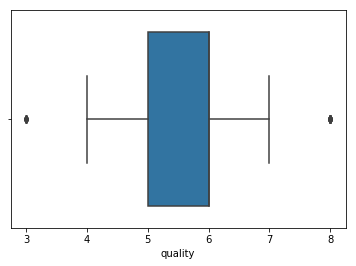

In [6]:
# Show spread of wine quality scores
df.head(n=5)
sns.boxplot(df['quality'])

In [7]:
# Make binary indicator indicating if wine quality is greater than 5
df['Quality_Good?'] = df['quality'] > 5 

In [8]:
# Get variables for model
Y = df['Quality_Good?']
X = df.drop(labels=['quality','Quality_Good?'],axis=1)

In [9]:
# Create model using decision trees
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

In [10]:
# Fit Model
dt = tree.DecisionTreeClassifier(criterion='entropy',
                                 max_depth=5,
                                 max_features=1)
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

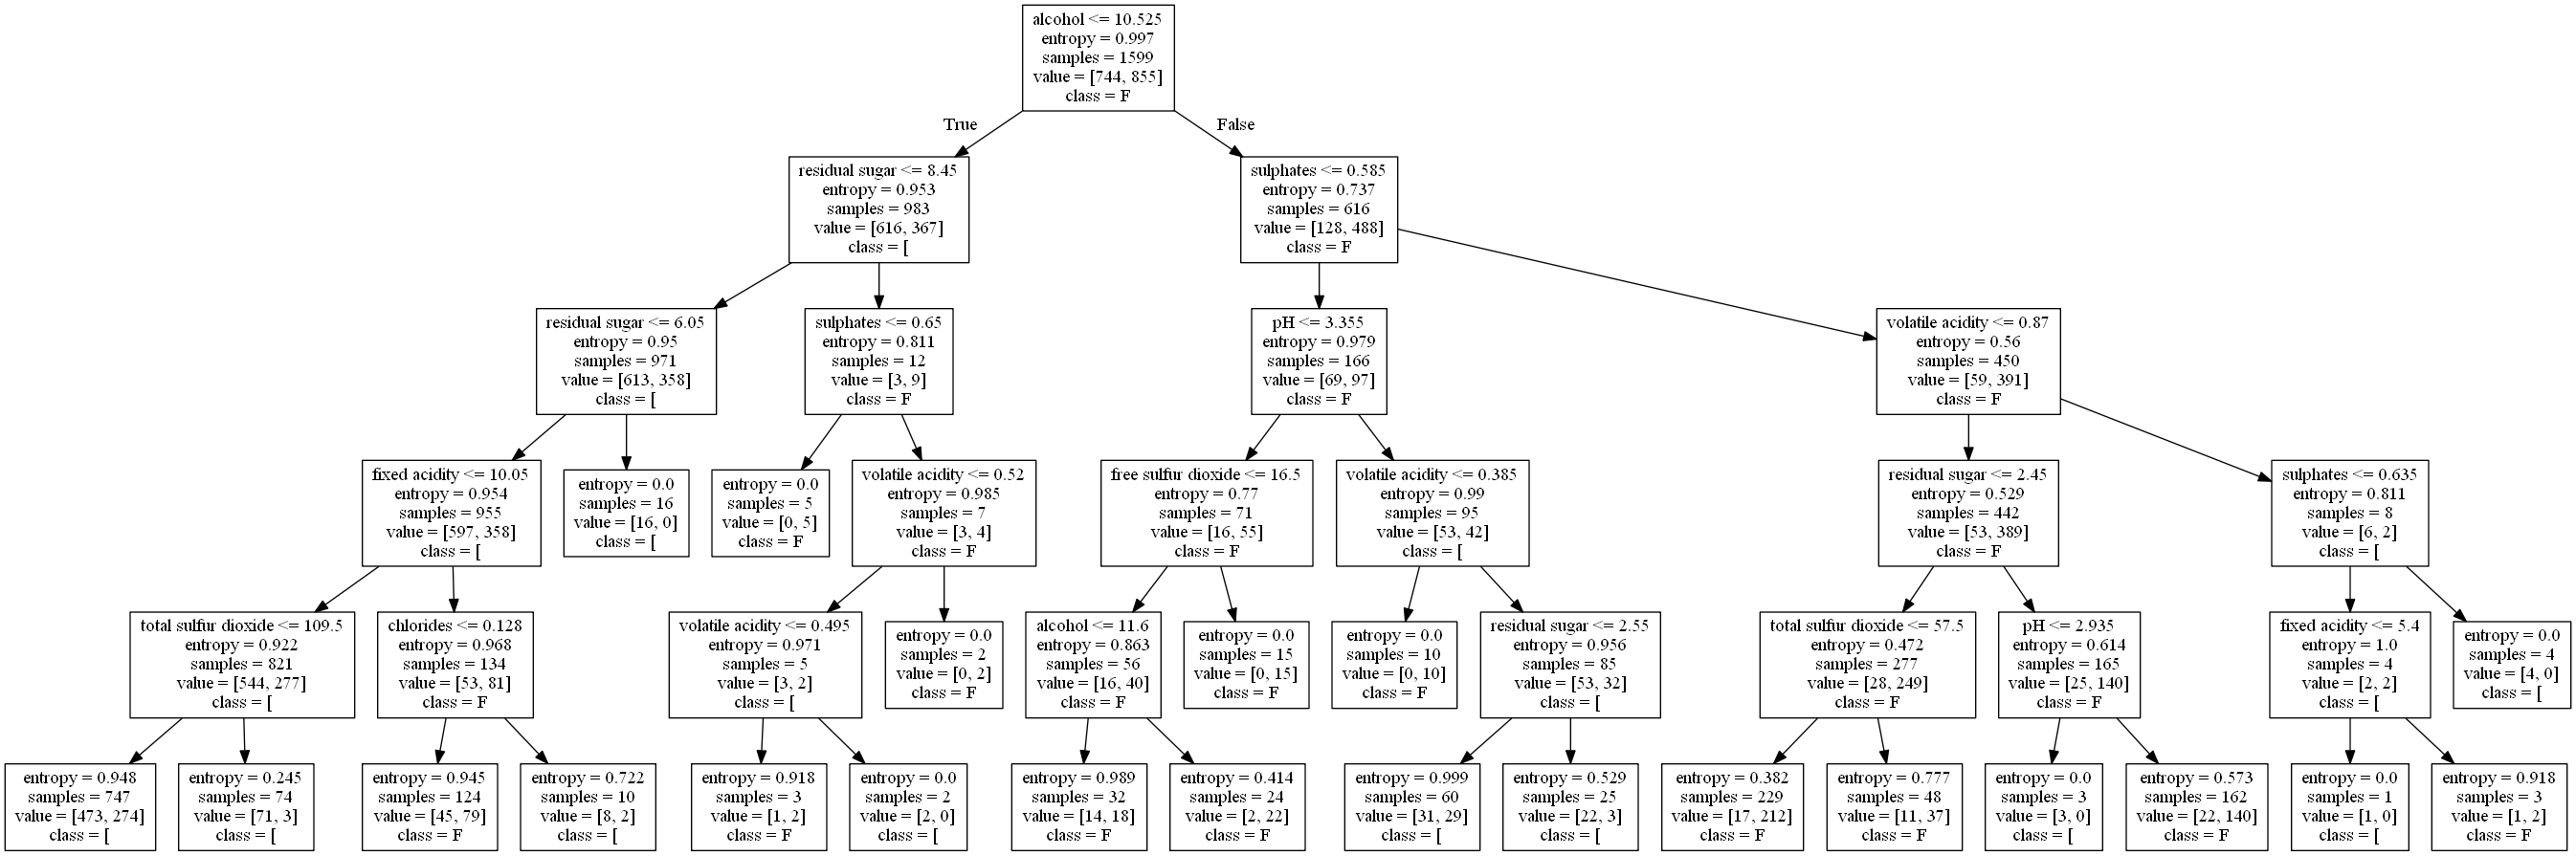

In [11]:
import graphviz
# Render Tree
dt_data = tree.export_graphviz(
    dt, out_file=None,
    feature_names=X.columns,
    class_names=str(Y.unique()))
graph = pydotplus.graph_from_dot_data(dt_data)
Image(graph.create_png())

In [14]:
import timeit

start = timeit.default_timer()
# Fit Model
dt = tree.DecisionTreeClassifier(criterion='entropy',
                                 max_depth=5,
                                 max_features=1)
dt.fit(X,Y)
stop = timeit.default_timer()
execution_time = stop - start
print(execution_time) #It returns time in sec

0.0030916309999895475


In [16]:
from sklearn import ensemble

start = timeit.default_timer()
# Fit Model
rfc = ensemble.RandomForestClassifier(n_estimators=10)
rfc.fit(X,Y)
stop = timeit.default_timer()
execution_time = stop - start
print(execution_time) #It returns time in sec

0.028622886999983166


In [ ]:
# Random trees take much longer to run than decision tree - makes sense since random forests are just lots of decision trees combined how does accuracy compare?

In [19]:
comparison = pd.DataFrame(Y)
comparison['DT_Pred'] = dt.predict(X)
comparison['RF_Pred'] = rfc.predict(X)

In [28]:
DT_Correct = comparison[comparison['Quality_Good?']==comparison['DT_Pred']]
RF_Correct = comparison[comparison['Quality_Good?']==comparison['RF_Pred']]
DT_p = len(DT_Correct)/len(comparison)
RF_p = len(RF_Correct)/len(comparison)
print("The Decision Tree Model Has {}% Accuracy while the Random Forest has {}% Accuracy".format(round(DT_p*100,2),round(RF_p*100,2)))

The Decision Tree Model Has 70.98% Accuracy while the Random Forest has 98.87% Accuracy


In [ ]:
# As would be expected the random forest example takes significantly longer to run but produces much better results